# **Objective**
#### In this project, I aim to **train a classical machine learning classification** algorithm on a dataset to classify patients based on factors that contribute to a heart attack. This notebook is a **step-by-step guide** for those who want to develop an accurate classification model ready for deployment.

## **Dataset Structure:**
> ##### **The dataset** includes **continuous numerical features**, as well as **one categorical feature** (gender). **The target is divided into two categories** (negative refers to the absence of a heart attack, while positive refers to the presence of a heart attack). For more details about the dataset, please refer to the dataset's page available on Kaggle.

## **Methodology**

> #### 1. **Data Loading and Pre-processing:**
> ##### We will apply **feature engineering** and feature selection **to extract the most useful information** from the raw dataset. Additionally, **the values will be scaled.**

> #### 2. **Model:**
> ##### **Several classification models will be tested**, and we will choose **the best one for hyperparameter tuning.**

> #### 3. **Evaluation:**
> ##### The **Recall score** will be used as an accuracy metric throughout the notebook because the cost of missing positive cases (false negatives) is high. Additionally, I will **plot the Feature importance, Confusion matrix, and Classification report** on the test set to evaluate the model's performance.

> #### 4. **Deployment:**
> ##### The final model **will be deployed**, and **I will provide the GitHub link to the entire project.**

## **Library setup**

In [3]:
! pip install seaborn plotly matplotlib tqdm

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached plotly-5.22.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.53.0-cp312-cp312-win_amd64.whl.metadata (165 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached plotly-5.22.0-py3-none-any.whl (16.4 MB)
Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl (8.0 MB)
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl (189 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.53.0-cp312-cp


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
import sklearn
import joblib

from tqdm.notebook import tqdm as tqdm

print(sklearn.__version__)

1.5.0


# **Data Loading and Pre-processing**
> * The process begins by **loading the dataset**, encoding non-numerical columns, and **checking if there is any noises or missing values.**

> * Next, the dataset undergoes a **feature engineering** function to generate **new features.**

> * Note that **feature selection (removing some features) did not improve the model's accuracy.**

> * Finally, the dataset is **scaled using MinMaxScaler** and **divided into training and testing sets.**

In [2]:
ds = pd.read_csv('./data/csv_dataset/Heart Attack.csv')
df = pd.DataFrame(ds)

display(df, df.describe(include='all'))

age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
0      64       1       66            160           83    160.0   1.80   
1      21       1       94             98           46    296.0   6.75   
2      55       1       64            160           77    270.0   1.99   
3      64       1       70            120           55    270.0  13.87   
4      55       1       64            112           65    300.0   1.08   
...   ...     ...      ...            ...          ...      ...    ...   
1314   44       1       94            122           67    204.0   1.63   
1315   66       1       84            125           55    149.0   1.33   
1316   45       1       85            168          104     96.0   1.24   
1317   54       1       58            117           68    443.0   5.80   
1318   51       1       94            157           79    134.0  50.89   

      troponin     class  
0        0.012  negative  
1        1.060  positive  
2        0.003  negative  
3        0.122  positive  
4        0.003  negative  
...        ...       ...  
1314     0.006  negative  
1315     0.172  positive  
1316     4.250  positive  
1317     0.359  positive  
1318     1.770  positive  

[1319 rows x 9 columns]

age       gender      impluse  pressurehight  pressurelow  \
count   1319.000000  1319.000000  1319.000000    1319.000000  1319.000000   
unique          NaN          NaN          NaN            NaN          NaN   
top             NaN          NaN          NaN            NaN          NaN   
freq            NaN          NaN          NaN            NaN          NaN   
mean      56.191812     0.659591    78.336619     127.170584    72.269143   
std       13.647315     0.474027    51.630270      26.122720    14.033924   
min       14.000000     0.000000    20.000000      42.000000    38.000000   
25%       47.000000     0.000000    64.000000     110.000000    62.000000   
50%       58.000000     1.000000    74.000000     124.000000    72.000000   
75%       65.000000     1.000000    85.000000     143.000000    81.000000   
max      103.000000     1.000000  1111.000000     223.000000   154.000000   

            glucose          kcm     troponin     class  
count   1319.000000  1319.000000  1319.000000      1319  
unique          NaN          NaN          NaN         2  
top             NaN          NaN          NaN  positive  
freq            NaN          NaN          NaN       810  
mean     146.634344    15.274306     0.360942       NaN  
std       74.923045    46.327083     1.154568       NaN  
min       35.000000     0.321000     0.001000       NaN  
25%       98.000000     1.655000     0.006000       NaN  
50%      116.000000     2.850000     0.014000       NaN  
75%      169.500000     5.805000     0.085500       NaN  
max      541.000000   300.000000    10.300000       NaN

In [3]:
# Check if there is any noises in 'gender column'
df['gender'].unique()

array([1, 0])

In [8]:
# Encoding the target ('positive', 'negative' -> 1, 0)
encoded_class = pd.get_dummies(df['class'], dtype=int, drop_first=True)
df['class'] = encoded_class
df

age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
0      64       1       66            160           83    160.0   1.80   
1      21       1       94             98           46    296.0   6.75   
2      55       1       64            160           77    270.0   1.99   
3      64       1       70            120           55    270.0  13.87   
4      55       1       64            112           65    300.0   1.08   
...   ...     ...      ...            ...          ...      ...    ...   
1314   44       1       94            122           67    204.0   1.63   
1315   66       1       84            125           55    149.0   1.33   
1316   45       1       85            168          104     96.0   1.24   
1317   54       1       58            117           68    443.0   5.80   
1318   51       1       94            157           79    134.0  50.89   

      troponin  class  
0        0.012      0  
1        1.060      1  
2        0.003      0  
3        0.122      1  
4        0.003      0  
...        ...    ...  
1314     0.006      0  
1315     0.172      1  
1316     4.250      1  
1317     0.359      1  
1318     1.770      1  

[1319 rows x 9 columns]

## **Visualization**

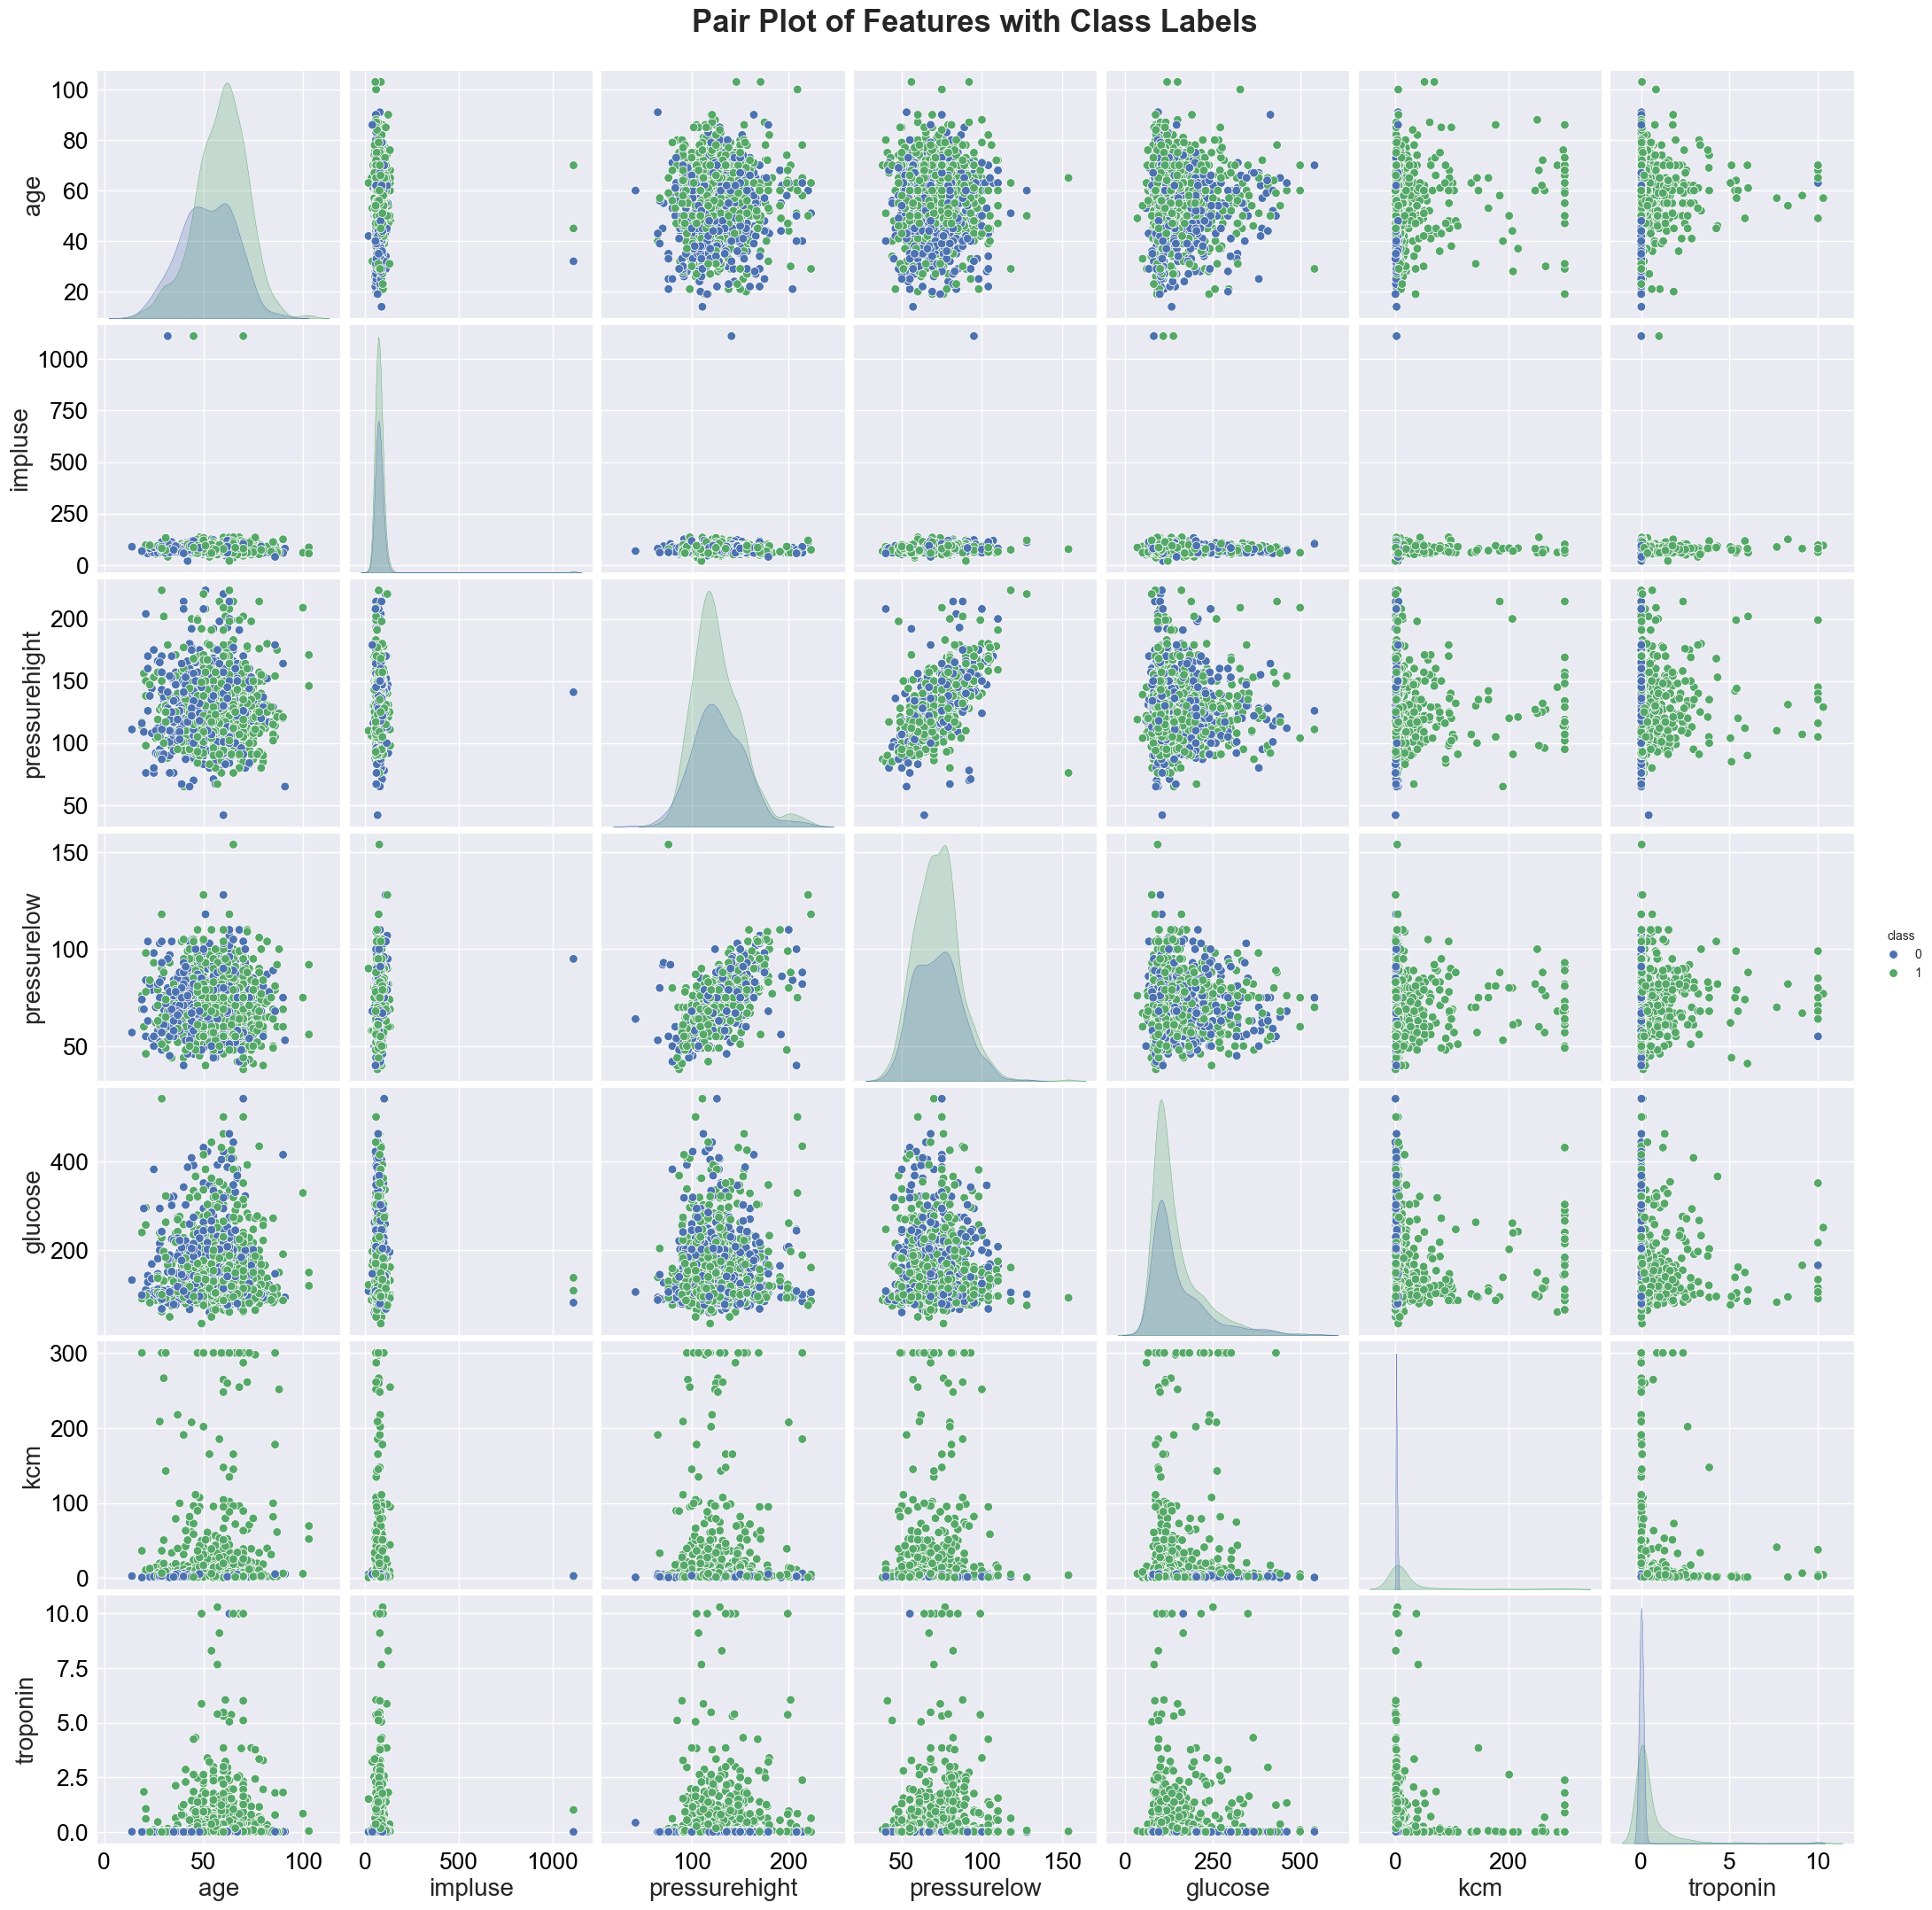

In [13]:
plt.style.use("seaborn-v0_8")

# Create pairplot
pairplot = sns.pairplot(df.drop(columns=['gender']), hue='class', height=3, aspect=1)

# Add grids
for ax in pairplot.axes.flatten():
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=19, labelcolor='black', width=1.5)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)

# Add title
plt.suptitle('Pair Plot of Features with Class Labels', fontsize=25, fontweight='bold', y=1.02)

# Show plot
plt.show()

##### As you can see there are some obvious **noises** on feature **'impluse'** that we need to **remove** them.

In [10]:
# Remove the noises
index = df.loc[df['impluse'] > 500].index
df.drop(index=index, inplace=True)
df

age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
0      64       1       66            160           83    160.0   1.80   
1      21       1       94             98           46    296.0   6.75   
2      55       1       64            160           77    270.0   1.99   
3      64       1       70            120           55    270.0  13.87   
4      55       1       64            112           65    300.0   1.08   
...   ...     ...      ...            ...          ...      ...    ...   
1314   44       1       94            122           67    204.0   1.63   
1315   66       1       84            125           55    149.0   1.33   
1316   45       1       85            168          104     96.0   1.24   
1317   54       1       58            117           68    443.0   5.80   
1318   51       1       94            157           79    134.0  50.89   

      troponin  class  
0        0.012      0  
1        1.060      1  
2        0.003      0  
3        0.122      1  
4        0.003      0  
...        ...    ...  
1314     0.006      0  
1315     0.172      1  
1316     4.250      1  
1317     0.359      1  
1318     1.770      1  

[1316 rows x 9 columns]

In [11]:
def feature_engineering(data):
    data = data.copy()
    
    for feature in data.drop(columns=['gender', 'class']).columns:
        # Determine the bin boundaries
        bins = pd.cut(data[feature], bins=7)
        # Assign bin labels
        data[feature+'_bin'] = pd.cut(data[feature], bins=bins.unique().categories)

        # Label encoding for the binned categories
        label_encoder = LabelEncoder()
        data[feature+'_bin_encoded'] = label_encoder.fit_transform(data[feature+'_bin'])
        
        # Drop the original binned columns
        data.drop([feature+'_bin'], axis=1, inplace=True)
        
    return data

df_1 = feature_engineering(df)

display(df_1, df_1.describe(include='all'))

age  gender  impluse  pressurehight  pressurelow  glucose    kcm  \
0      64       1       66            160           83    160.0   1.80   
1      21       1       94             98           46    296.0   6.75   
2      55       1       64            160           77    270.0   1.99   
3      64       1       70            120           55    270.0  13.87   
4      55       1       64            112           65    300.0   1.08   
...   ...     ...      ...            ...          ...      ...    ...   
1314   44       1       94            122           67    204.0   1.63   
1315   66       1       84            125           55    149.0   1.33   
1316   45       1       85            168          104     96.0   1.24   
1317   54       1       58            117           68    443.0   5.80   
1318   51       1       94            157           79    134.0  50.89   

      troponin  class  age_bin_encoded  impluse_bin_encoded  \
0        0.012      0                3                    2   
1        1.060      1                0                    4   
2        0.003      0                3                    2   
3        0.122      1                3                    3   
4        0.003      0                3                    2   
...        ...    ...              ...                  ...   
1314     0.006      0                2                    4   
1315     0.172      1                4                    3   
1316     4.250      1                2                    3   
1317     0.359      1                3                    2   
1318     1.770      1                2                    4   

      pressurehight_bin_encoded  pressurelow_bin_encoded  glucose_bin_encoded  \
0                             4                        2                    1   
1                             2                        0                    3   
2                             4                        2                    3   
3                             3                        1                    3   
4                             2                        1                    3   
...                         ...                      ...                  ...   
1314                          3                        1                    2   
1315                          3                        1                    1   
1316                          4                        3                    0   
1317                          2                        1                    5   
1318                          4                        2                    1   

      kcm_bin_encoded  troponin_bin_encoded  
0                   0                     0  
1                   0                     0  
2                   0                     0  
3                   0                     0  
4                   0                     0  
...               ...                   ...  
1314                0                     0  
1315                0                     0  
1316                0                     2  
1317                0                     0  
1318                1                     1  

[1316 rows x 16 columns]

age       gender      impluse  pressurehight  pressurelow  \
count  1316.000000  1316.000000  1316.000000    1316.000000  1316.000000   
mean     56.208207     0.660334    75.982523     127.139058    72.217325   
std      13.637762     0.473776    15.276877      26.144139    14.007815   
min      14.000000     0.000000    20.000000      42.000000    38.000000   
25%      47.000000     0.000000    64.000000     110.000000    62.000000   
50%      58.000000     1.000000    74.000000     124.000000    72.000000   
75%      65.000000     1.000000    85.000000     143.000000    81.000000   
max     103.000000     1.000000   135.000000     223.000000   154.000000   

           glucose          kcm     troponin        class  age_bin_encoded  \
count  1316.000000  1316.000000  1316.000000  1316.000000      1316.000000   
mean    146.718617    15.303153     0.360970     0.613982         2.825988   
std      74.979672    46.375924     1.155668     0.487020         1.104829   
min      35.000000     0.321000     0.001000     0.000000         0.000000   
25%      98.000000     1.657500     0.006000     0.000000         2.000000   
50%     116.000000     2.850000     0.014000     1.000000         3.000000   
75%     170.000000     5.812500     0.085250     1.000000         4.000000   
max     541.000000   300.000000    10.300000     1.000000         6.000000   

       impluse_bin_encoded  pressurehight_bin_encoded  \
count          1316.000000                1316.000000   
mean              2.909574                   2.792553   
std               0.956959                   1.057426   
min               0.000000                   0.000000   
25%               2.000000                   2.000000   
50%               3.000000                   3.000000   
75%               3.000000                   3.000000   
max               6.000000                   6.000000   

       pressurelow_bin_encoded  glucose_bin_encoded  kcm_bin_encoded  \
count              1316.000000          1316.000000      1316.000000   
mean                  1.569909             0.983283         0.212006   
std                   0.874031             1.122068         0.952024   
min                   0.000000             0.000000         0.000000   
25%                   1.000000             0.000000         0.000000   
50%                   2.000000             1.000000         0.000000   
75%                   2.000000             1.000000         0.000000   
max                   6.000000             6.000000         6.000000   

       troponin_bin_encoded  
count           1316.000000  
mean               0.137538  
std                0.669888  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                6.000000

In [12]:
def train_test_data(data):
    data = data.copy()

    # Features
    X = data.drop(columns=['class']).values
    # Target
    Y = data['class'].values

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the values
    X = scaler.fit_transform(X)

    # Devide the dataset into train and test sets.
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, shuffle=True, random_state=248)

    print('Data Shapes:', x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    
    return x_train, x_test, y_train, y_test
    
x_train, x_test, y_train, y_test = train_test_data(df_1)

Data Shapes: (658, 15) (658,) (658, 15) (658,)


# **Model**
> * **Ten** of the most popular classification algorithms were tested, and the **Gradient Boosting Classifier performed the best**. Therefore, we apply hyperparameter tuning to the Gradient Boosting Classifier.

> * **Hyperparameter tuning** is done using **GridSearchCV** from scikit-learn to improve the accuracy.

> * **The best model is saved** using the joblib library **as 'trained_model-0.1.0.pkl'.**

In [13]:
scores = {}

for i in tqdm([KNeighborsClassifier, LogisticRegression, RandomForestClassifier, SVC, DecisionTreeClassifier,
               GradientBoostingClassifier, AdaBoostClassifier, LinearDiscriminantAnalysis,
              QuadraticDiscriminantAnalysis, GaussianNB]):
    model = i()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    recall = recall_score(y_test, y_pred, pos_label=1)
    
    scores[i.__name__] = recall
    
scores

  0%|          | 0/10 [00:00<?, ?it/s]

{'KNeighborsClassifier': np.float64(0.7435897435897436),
 'LogisticRegression': np.float64(0.9102564102564102),
 'RandomForestClassifier': np.float64(0.9794871794871794),
 'SVC': np.float64(0.9307692307692308),
 'DecisionTreeClassifier': np.float64(0.9794871794871794),
 'GradientBoostingClassifier': np.float64(0.982051282051282),
 'AdaBoostClassifier': np.float64(0.9769230769230769),
 'LinearDiscriminantAnalysis': np.float64(0.8435897435897436),
 'QuadraticDiscriminantAnalysis': np.float64(0.0),
 'GaussianNB': np.float64(0.32564102564102565)}

In [14]:
# Hyperparameter grid for Gradient Boosting Classifier
parameters = {
    'n_estimators': [50, 100, 150],           # Number of boosting stages to be run
    'learning_rate': [0.01, 0.05, 0.1],       # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 4, 5],                   # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]    # Number of features to consider when looking for the best split
}

def train_rfr_model(params, x_train, x_test, y_train, y_test):
    # Initialize the model
    default_GBC = GradientBoostingClassifier(random_state=248)
    
    default_GBC.fit(x_train, y_train.ravel())

    # Evaluate on train set
    print("Train recall:", recall_score(y_train,
                                       default_GBC.predict(x_train),
                                       pos_label=1))
    
    # Evaluate on test set
    default_GBC_recall = recall_score(y_test,
                                       default_GBC.predict(x_test),
                                       pos_label=1)
    print("Test recall:", default_GBC_recall)
    
    # Initialize the model
    GBC = GradientBoostingClassifier(random_state=248)

    # Initialize GridSearchCV
    GBC_grid = GridSearchCV(estimator=GBC, param_grid=params, 
                            cv=5, verbose=0, n_jobs=-1)

    # Fit the model
    GBC_grid.fit(x_train, y_train.ravel())

    # Best parameters and best score
    print("Best parameters:", GBC_grid.best_params_)

    # Get the best model
    best_GBC = GBC_grid.best_estimator_
    
    # Evaluate on train set
    print("Train recall:", recall_score(y_train,
                                       best_GBC.predict(x_train),
                                       pos_label=1))
    
    # Evaluate on test set
    best_GBC_recall = recall_score(y_test,
                                       best_GBC.predict(x_test),
                                       pos_label=1)
    print("Test recall:", best_GBC_recall)
    
    if best_GBC_recall > default_GBC_recall:
        model = best_GBC
    else:
        model = default_GBC
    
    with open('./model/v1/trained_model-0.1.0.pkl', 'wb') as f:
        joblib.dump(model, f)

        
train_rfr_model(parameters, x_train, x_test, y_train, y_test)

with open('./model/v1/trained_model-0.1.0.pkl', 'rb') as f:
    model = joblib.load(f)

Train recall: 1.0
Test recall: 0.982051282051282
Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Train recall: 0.9976076555023924
Test recall: 0.9897435897435898


##### Seems like **hyperparameter-tuning helped in reducing overfitting**, resulting in a more generalized model.

# **Evaluation**
> * A **feature importance plot** is presented to show which features play a crucial role in predicting the target.

> * **Class distribution plot** is presented to show the **existing and predicted classes distribution.**

> * **Evaluation metrics** such as **confusion matrix and classification report** are applied to the predicted values, and presented in plots.

In [16]:
def feature_importance_plot(model, df):
    # Calculate feature importances
    importances = model.feature_importances_
    features = df.drop(columns=['class']).columns
    features = [(x.replace('_', ' ')).capitalize() for x in features]
    
    feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=True)
    
    # Create the plotly bar plot with a gradient color scale
    figure = go.Figure(go.Bar(
        x=feature_importances['Importance'],
        y=feature_importances['Feature'],
        orientation='h',
        marker=dict(
            color=feature_importances['Importance'],
            colorscale='Viridis',
            showscale=True
        )
    ))
    
    # Update layout
    figure.update_layout(
        title_text='Feature Importances',
        title_font=dict(size=20, family='Balto', color='black'),
        title_x=0.5,
        xaxis=dict(
            title='Importance',
            title_font=dict(family='Balto', color='black'),
            tickfont=dict(family='Balto', color='black')
        ),
        yaxis=dict(
            title='Feature',
            title_font=dict(family='Balto', color='black'),
            tickfont=dict(family='Balto', color='black')
        ),
        margin=dict(l=60, r=20, t=35, b=30)
    )

    # Show the plot
    figure.show()

feature_importance_plot(model, df_1)

### **Class Distribution**

In [17]:
def plot_class_distribution(df):
    # Counting the actual and predicted class distributions (+, -).
    class_distribution_df1 = df['Actual values'].value_counts()
    class_distribution_df2 = df['Predicted values'].value_counts()
    recall = recall_score(df['Actual values'].values, df['Predicted values'].values)
    
    colors = ['#0504AA', '#ED0101']

    # Defining figure
    fig = go.Figure()

    # Adding bars for each dataframe and each class
    for class_label in class_distribution_df1.index:
        # Getting the name of each class (+ or -)
        class_name = 'Positive' if class_label == 1 else 'Negative'
        
        # Creating stacked bar for each class
        fig.add_trace(go.Bar(
            x=['Actual', 'Predicted'],
            y=[class_distribution_df1.get(class_label, 0),
               class_distribution_df2.get(class_label, 0)],
            
            name=f'{class_name}',
            marker=dict(color=colors[class_label]),
            opacity=0.75,
            width=0.25
        ))
    
    # Updating layout
    fig.update_layout(
        height=700,
        width=800,
        title_text=f"Class Distribution | Recall: {round(float(recall), 4)}",
        title_font=dict(size=25, family='Balto'),
        title_x=0.5,
        title_y=0.98,
        xaxis=dict(title='Columns', title_font=dict(family='Balto', size=19), tickfont=dict(family='Balto', size=19)),
        yaxis=dict(title='Count', title_font=dict(family='Balto', size=19), tickfont=dict(family='Balto', size=19)),
        margin=dict(l=60, r=20, t=50, b=40), 
        legend=dict(x=0.38, y=0.98, traceorder='normal', orientation='h', font=dict(family='Balto')),  # Placing legend inside
        barmode='stack'  # Setting barmode to 'stack' to stack the bars
                )
    # Showing the figure
    fig.show()
    

prediction_df = pd.DataFrame({'Actual values': y_test,
                             'Predicted values': model.predict(x_test)})

plot_class_distribution(prediction_df)

## **Classification Metrics**

In [18]:
# Plots Confusion Matrix
def Confusion_Matrix(df):
    confusionMatrix = confusion_matrix(df['Actual values'], df['Predicted values'])

    # Defining class names
    class_names = ['Negative', 'Positive']

    # Normalizing confusion matrix
    confusionMatrixNormalized = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]

    # Creating heatmap trace for confusion matrix
    heatmap_trace = go.Heatmap(z=confusionMatrixNormalized,
                               x=class_names,
                               y=class_names,
                               colorscale='Viridis',
                               colorbar=dict(title='Proportion', title_font=dict(family='Balto'),
                                             tickfont=dict(family='Balto'), tickformat='.2f'))

    # Creating text annotations for each cell in the heatmap
    annotations = []
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            annotations.append(dict(text=str(confusionMatrix[i, j]),
                                    x=class_names[j],
                                    y=class_names[i],
                                    showarrow=False,
                                    font=dict(color='black', family='Balto', size=25)))

    # Creating layout
    layout = go.Layout(height=700,
                       width=800,
                       title='Confusion Matrix',
                       title_font=dict(size=25, family='Balto'),
                       title_x=0.5,
                       title_y=0.95,
                       xaxis=dict(title='Predicted label', title_font=dict(family='Balto', size=19), tickfont=dict(family='Balto', size=19)),
                       yaxis=dict(title='True label', title_font=dict(family='Balto', size=19), tickfont=dict(family='Balto', size=19)),
                       annotations=annotations)

    # Creating figure
    fig = go.Figure(data=[heatmap_trace], layout=layout)

    # Showing the plot
    fig.show()
    
Confusion_Matrix(prediction_df)

In [19]:
# Rounds the number of Classification Report output
def round_dict(d, decimals=2):
    if isinstance(d, dict):
        return {key: round_dict(value, decimals) for key, value in d.items()}
    else:
        return round(d, decimals)

# Plots Classification Report
def Classification_Report(df):
    clf_report = classification_report(df['Actual values'],
                                       df['Predicted values'],
                                       labels=np.arange(2),
                                       target_names=['Negative', 'Positive'],
                                       output_dict=True)

    rounded_data = round_dict(clf_report, decimals=2)

    # Converting classification report data to dataframe
    df_clf_report = pd.DataFrame.from_dict(rounded_data)

    # Transposing dataframe for proper visualization
    df_clf_report = df_clf_report.T

    # Reversing the order of rows in the dataframe
    df_clf_report = df_clf_report.iloc[::-1]

    # Creating heatmap trace for classification report
    heatmap_trace = go.Heatmap(z=df_clf_report.values[:, :-1],  # Excluding 'support' column
                               x=df_clf_report.columns[:-1],  # Excluding 'support' column
                               y=df_clf_report.index,
                               colorscale='Viridis')

    # Creating text annotations for each cell in the heatmap
    annotations = []
    for i in range(len(df_clf_report.index)):
        for j in range(len(df_clf_report.columns) - 1):
            annotations.append(dict(text=str(df_clf_report.values[i, j]),
                                    x=df_clf_report.columns[j],
                                    y=df_clf_report.index[i],
                                    showarrow=False,
                                    font=dict(color='black', family='Balto', size=22)))

    # Creating layout
    layout = go.Layout(height=800,
                       width=800,
                       title='Classification Report',
                       title_font=dict(size=25, family='Balto'),
                       title_x=0.5,
                       title_y=0.95,
                       xaxis=dict(title='Metrics', title_font=dict(family='Balto', size=19), tickfont=dict(family='Balto', size=19)),
                       yaxis=dict(title='Class', title_font=dict(family='Balto', size=19), tickfont=dict(family='Balto', size=19)),
                       annotations=annotations)

    # Creating figure
    fig = go.Figure(data=[heatmap_trace], layout=layout)

    # Showing the plot
    fig.show()
    
Classification_Report(prediction_df)

# **Happy coding!**